In [2]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18,ResNet18_Weights
from torchcam.methods import SmoothGradCAMpp

model = resnet18(weights='DEFAULT').eval()
# Get your input
img = read_image("code/111.png")
# Preprocess it for your chosen model
input_tensor = normalize(
    resize(img, (224, 224)) / 255.0, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
)

with SmoothGradCAMpp(model) as cam_extractor:
    # Preprocess your data and feed it to the model
    out = model(input_tensor.unsqueeze(0))
    # Retrieve the CAM by passing the class index and the model output
    activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

In [37]:
from datasets import load_dataset

ds = load_dataset("zh-plus/tiny-imagenet")

print(ds)
dataset = ds["valid"]
dataset[0]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 100000
    })
    valid: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
 'label': 0}

In [48]:
from torchvision.transforms import Compose, Resize, ToTensor,CenterCrop

jitter = Compose(
    [
        Resize(256),
        CenterCrop(224),
        ToTensor(),
    ]
)

def transforms(examples):
    examples["modified_image"] = [jitter(image.convert("RGB")) for image in examples["image"]]
    return examples

dataset.set_transform(transforms)

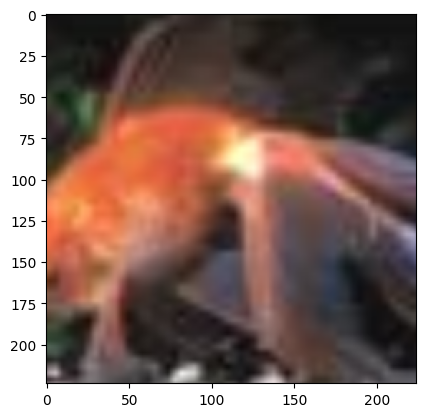

In [56]:
from torchvision.transforms import ToPILImage
to_pil = ToPILImage()
pil_image = to_pil(dataset[0]['modified_image'])

numpy_image = pil_image.convert('RGB')  # 确保转换为 RGB 模式
plt.imshow(numpy_image)

In [58]:
dataset.__len__()

10000